<a href="https://colab.research.google.com/github/anuragsinghbhandari/construction_model/blob/main/Training_construction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install bing-image-downloader


In [41]:
!mkdir img_green_shade

mkdir: cannot create directory ‘/content/images/.ipynb_checkpoints’: File exists


In [42]:
!rm -r /content/images/.ipynb_checkpoints


In [54]:
!zip images.zip images

  adding: images/ (stored 0%)


In [6]:
import tensorflow

In [24]:
from bing_image_downloader import downloader
query_string = "construction green net"
downloader.download(query_string, limit=400,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)


[%] Downloading Images to /content/images/construction green net


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://apacsafety.com/wp-content/uploads/2022/04/green-construction-safety-net.png
[%] File Downloaded !

[%] Downloading Image #2 from https://5.imimg.com/data5/SELLER/Default/2022/2/KJ/LE/GA/14841064/construction-green-shade-net-1000x1000.jpeg
[Error]Invalid image, not saving https://5.imimg.com/data5/SELLER/Default/2022/2/KJ/LE/GA/14841064/construction-green-shade-net-1000x1000.jpeg

[!] Issue getting: https://5.imimg.com/data5/SELLER/Default/2022/2/KJ/LE/GA/14841064/construction-green-shade-net-1000x1000.jpeg
[!] Error:: Invalid image, not saving https://5.imimg.com/data5/SELLER/Default/2022/2/KJ/LE/GA/14841064/construction-green-shade-net-1000x1000.jpeg

[%] Downloading Image #2 from https://5.imimg.com/data5/EH/FV/TQ/SELLER-7115192/construction-safety-net-500x500.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://

In [25]:
query_string2 = "wearing ppe construction work india"
downloader.download(query_string2, limit=400,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)


Streaming output truncated to the last 5000 lines.
[%] Indexed 35 Images on Page 119.


[%] Downloading Image #134 from https://resources.duralabel.com/hubfs/Imported_Blog_Media/ppe-infographic-1-1-1-1-1-1.jpg
[%] File Downloaded !

[%] Downloading Image #135 from http://www.interestingreality.com/wp-content/uploads/2019/08/hi-vis-safety-clothing.1jpg-1024x576.jpg
[%] File Downloaded !



[!!]Indexing page: 120

[%] Indexed 35 Images on Page 120.


[%] Downloading Image #136 from https://akm-img-a-in.tosshub.com/indiatoday/images/story/202005/PPE_Labourer_Chennai_PTI_0.jpeg?size=690:388
[%] File Downloaded !



[!!]Indexing page: 121

[%] Indexed 35 Images on Page 121.


[%] Downloading Image #137 from https://facilitiesmanagementadvisor.blr.com/app/uploads/sites/8/2023/01/OSHAs-Workplace-PPE-Requirements-Infographic-FM-Version.png
[%] File Downloaded !



[!!]Indexing page: 122

[%] Indexed 35 Images on Page 122.




[!!]Indexing page: 123

[%] Indexed 35 Images on Page 123.


[%] Dow

KeyboardInterrupt: 

In [26]:
query_string3 = "in house parking space construction india"
downloader.download(query_string3, limit=400,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/in house parking space construction india


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://lh3.googleusercontent.com/proxy/1eG-lYWqQ73qhfbgAc7QP3FLxQOGalXkgO4tb9eUEdHdVhrhkEn3pmXXtHCUnvxKfL6adLVkHPms1eAMnc2L2In8vOuPKNgsZIE=s0-d
[%] File Downloaded !

[%] Downloading Image #2 from https://res.cloudinary.com/urbanclap/image/upload/t_medium_res_portfolio_medium/images/59fb16b1d217c25e00fabb98/1509641465297-850336a2918e787557bf3db4f2babb13.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-bCE719o3w1I/T6VaNuaJPgI/AAAAAAAANxU/m_9ydCIy_v8/s1600/ground-parking-house-india.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://3.bp.blogspot.com/-SqEVh83twW8/WMEnsfC9WWI/AAAAAAABAJ4/smU4h4k0o9oonfCD2S3bEcL4Ze2VXmjkACLcB/s1600/attractive-house-modern.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-XI4Rh651LTE/TgTFij7w0qI/AAAAAAAAAD

KeyboardInterrupt: 

In [27]:
query_string4 = "rain water harvesting during real house construction india"
downloader.download(query_string4, limit=400,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 15

[%] Indexed 35 Images on Page 15.


[%] Downloading Image #45 from https://www.iamrenew.com/wp-content/uploads/2023/06/Rainwater-harvesting-RWH.jpg
[%] File Downloaded !



[!!]Indexing page: 16

[%] Indexed 35 Images on Page 16.


[%] Downloading Image #46 from https://i.pinimg.com/originals/1e/d2/9c/1ed29c2a8d6ff050b06a07416ca6baeb.jpg
[%] File Downloaded !



[!!]Indexing page: 17

[%] Indexed 35 Images on Page 17.


[%] Downloading Image #47 from https://www.rainwaterharvestingpune.in/wp-content/uploads/2019/10/rainwater-harvesting.jpg
[%] File Downloaded !

[%] Downloading Image #48 from http://www.commonfloor.com/articles/wp-content/uploads/2012/05/dhvgfhsd.jpg
[%] File Downloaded !

[%] Downloading Image #49 from https://happho.com/wp-content/uploads/2019/01/Creating-a-Rain-water-Harvesting-system-in-your-own-garden.jpg
[%] File Downloaded !



[!!]Indexing page: 18

[%] Indexed 35 Images on Page 18.




KeyboardInterrupt: 

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/images',  # Folder containing the 4 labeled folders
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # 'binary' for binary classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')  # 4 output units for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Save the model
model.save('cnn_model.h5')


Found 1137 images belonging to 4 classes.
Found 284 images belonging to 4 classes.
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.3090 - loss: 0.5959 - val_accuracy: 0.5493 - val_loss: 0.4325
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5041 - loss: 0.4676 - val_accuracy: 0.5915 - val_loss: 0.4213
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5415 - loss: 0.4477 - val_accuracy: 0.6725 - val_loss: 0.3643
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6339 - loss: 0.4087 - val_accuracy: 0.7007 - val_loss: 0.3656
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5890 - loss: 0.4124 - val_accuracy: 0.7254 - val_loss: 0.3325
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6924 - loss: 0.3463 - val_accuracy: 0.7500 - val_loss: 0.3151
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7079 - loss: 0.3163 - val_accuracy: 0.7570 - val_loss: 0.3124
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,470 (37.82 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,314 (25.22 MB)

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('cnn_model.h5')

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize the image
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape
    img_array /= 255.0  # Normalize the image (same as during training)
    return img_array

# Make a prediction
def predict_image(img_path):
    processed_image = preprocess_image(img_path)
    predictions = model.predict(processed_image)[0]  # Get the prediction
    labels = ['green_cloth', 'parking_space', 'rainwater_harvesting', 'safety_precautioins']

    # Threshold for considering whether the category is present (e.g., > 0.5)
    result = {labels[i]: (predictions[i] > 0.5) for i in range(len(labels))}

    return result




In [46]:
prediction_result = predict_image("/content/test image.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [47]:
print(prediction_result)

{'green_cloth': False, 'parking_space': True, 'rainwater_harvesting': False, 'safety_precautioins': False}


In [48]:
import matplotlib.pyplot as plt

In [49]:
# Display image with prediction
def show_image_with_prediction(img_path, prediction_result):
    # Load and display the image
    img = image.load_img(img_path)
    plt.imshow(img)

    # Build a string with the prediction results
    prediction_text = '\n'.join([f'{label}: {"Yes" if value else "No"}' for label, value in prediction_result.items()])

    # Add the prediction text on the image
    plt.text(10, -20, prediction_text, color='red', fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Show the image
    plt.axis('off')  # Hide axes
    plt.show()



In [50]:
# Example usage
img_path = 'path_to_new_image.jpg'

def predictimg(img_path):
  prediction_result = predict_image(img_path)
  show_image_with_prediction(img_path, prediction_result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


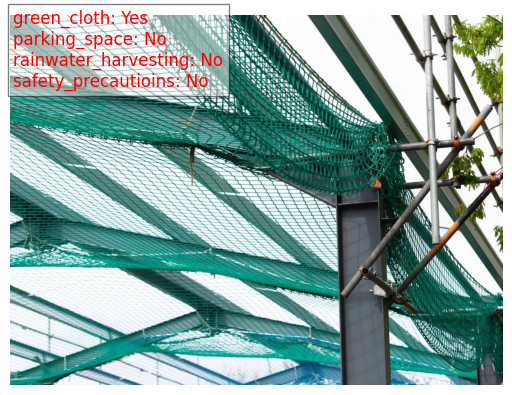

In [53]:
predictimg("/content/images/green_cloth/Image_4.jpg")